In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
from matplotlib import patches
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

import os
import math
import random

import keras
from keras.models import Sequential
from keras.layers import Input, Dense, Conv2D, Flatten, MaxPooling2D
from keras.layers import Dropout
from keras.callbacks import EarlyStopping

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn import preprocessing
from sklearn.metrics import roc_curve, roc_auc_score, auc

import scipy.stats as st
from scipy.stats import poisson
from scipy.interpolate import interp1d
from scipy.stats import norm

In [2]:
from sklearn.neighbors import KernelDensity # paquete necesario
from sklearn.model_selection import GridSearchCV

import scipy.integrate as integrate

### TODOS JUNTOS

In [3]:
LQ800_results_16bins_beta = np.loadtxt('saved-results/LQdown800GeV.txt')[0]
LQ800_results_16bins_beta_plus = np.loadtxt('saved-results/LQdown800GeV.txt')[1]
LQ800_results_16bins_beta_min = np.loadtxt('saved-results/LQdown800GeV.txt')[2]

LQ800_results_MLL_KDE_beta = np.loadtxt('saved-results/LQdown800GeV.txt')[9]
LQ800_results_MLL_KDE_beta_plus = np.loadtxt('saved-results/LQdown800GeV.txt')[10]
LQ800_results_MLL_KDE_beta_min = np.loadtxt('saved-results/LQdown800GeV.txt')[11]

In [4]:
LQ1000_results_16bins_beta = np.loadtxt('saved-results/LQdown1000GeV.txt')[0]
LQ1000_results_16bins_beta_plus = np.loadtxt('saved-results/LQdown1000GeV.txt')[1]
LQ1000_results_16bins_beta_min = np.loadtxt('saved-results/LQdown1000GeV.txt')[2]

LQ1000_results_MLL_KDE_beta = np.loadtxt('saved-results/LQdown1000GeV.txt')[9]
LQ1000_results_MLL_KDE_beta_plus = np.loadtxt('saved-results/LQdown1000GeV.txt')[10]
LQ1000_results_MLL_KDE_beta_min = np.loadtxt('saved-results/LQdown1000GeV.txt')[11]

In [5]:
LQ1200_results_16bins_beta = np.loadtxt('saved-results/LQdown1200GeV.txt')[0]
LQ1200_results_16bins_beta_plus = np.loadtxt('saved-results/LQdown1200GeV.txt')[1]
LQ1200_results_16bins_beta_min = np.loadtxt('saved-results/LQdown1200GeV.txt')[2]

LQ1200_results_MLL_KDE_beta = np.loadtxt('saved-results/LQdown1200GeV.txt')[9]
LQ1200_results_MLL_KDE_beta_plus = np.loadtxt('saved-results/LQdown1200GeV.txt')[10]
LQ1200_results_MLL_KDE_beta_min = np.loadtxt('saved-results/LQdown1200GeV.txt')[11]

In [6]:
LQ1400_results_16bins_beta = np.loadtxt('saved-results/LQdown1400GeV.txt')[0]
LQ1400_results_16bins_beta_plus = np.loadtxt('saved-results/LQdown1400GeV.txt')[1]
LQ1400_results_16bins_beta_min = np.loadtxt('saved-results/LQdown1400GeV.txt')[2]

LQ1400_results_MLL_KDE_beta = np.loadtxt('saved-results/LQdown1400GeV.txt')[9]
LQ1400_results_MLL_KDE_beta_plus = np.loadtxt('saved-results/LQdown1400GeV.txt')[10]
LQ1400_results_MLL_KDE_beta_min = np.loadtxt('saved-results/LQdown1400GeV.txt')[11]

In [7]:
LQ1600_results_16bins_beta = np.loadtxt('saved-results/LQdown1600GeV.txt')[0]
LQ1600_results_16bins_beta_plus = np.loadtxt('saved-results/LQdown1600GeV.txt')[1]
LQ1600_results_16bins_beta_min = np.loadtxt('saved-results/LQdown1600GeV.txt')[2]

LQ1600_results_MLL_KDE_beta = np.loadtxt('saved-results/LQdown1600GeV.txt')[9]
LQ1600_results_MLL_KDE_beta_plus = np.loadtxt('saved-results/LQdown1600GeV.txt')[10]
LQ1600_results_MLL_KDE_beta_min = np.loadtxt('saved-results/LQdown1600GeV.txt')[11]

In [8]:
LQ1800_results_16bins_beta = np.loadtxt('saved-results/LQdown1800GeV.txt')[0]
LQ1800_results_16bins_beta_plus = np.loadtxt('saved-results/LQdown1800GeV.txt')[1]
LQ1800_results_16bins_beta_min = np.loadtxt('saved-results/LQdown1800GeV.txt')[2]

LQ1800_results_MLL_KDE_beta = np.loadtxt('saved-results/LQdown1800GeV.txt')[9]
LQ1800_results_MLL_KDE_beta_plus = np.loadtxt('saved-results/LQdown1800GeV.txt')[10]
LQ1800_results_MLL_KDE_beta_min = np.loadtxt('saved-results/LQdown1800GeV.txt')[11]

In [9]:
results_16bins_beta00 = [LQ800_results_16bins_beta[0],LQ1000_results_16bins_beta[0],LQ1200_results_16bins_beta[0],LQ1400_results_16bins_beta[0],LQ1600_results_16bins_beta[0],LQ1800_results_16bins_beta[0]]
results_16bins_plus_beta00 = [LQ800_results_16bins_beta_plus[0],LQ1000_results_16bins_beta_plus[0],LQ1200_results_16bins_beta_plus[0],LQ1400_results_16bins_beta_plus[0],LQ1600_results_16bins_beta_plus[0],LQ1800_results_16bins_beta_plus[0]]
results_16bins_min_beta00 = [LQ800_results_16bins_beta_min[0],LQ1000_results_16bins_beta_min[0],LQ1200_results_16bins_beta_min[0],LQ1400_results_16bins_beta_min[0],LQ1600_results_16bins_beta_min[0],LQ1800_results_16bins_beta_min[0]]

results_MLL_KDE_beta00 = [LQ800_results_MLL_KDE_beta[0],LQ1000_results_MLL_KDE_beta[0],LQ1200_results_MLL_KDE_beta[0],LQ1400_results_MLL_KDE_beta[0],LQ1600_results_MLL_KDE_beta[0],LQ1800_results_MLL_KDE_beta[0]]
results_MLL_KDE_plus_beta00 = [LQ800_results_MLL_KDE_beta_plus[0],LQ1000_results_MLL_KDE_beta_plus[0],LQ1200_results_MLL_KDE_beta_plus[0],LQ1400_results_MLL_KDE_beta_plus[0],LQ1600_results_MLL_KDE_beta_plus[0],LQ1800_results_MLL_KDE_beta_plus[0]]
results_MLL_KDE_min_beta00 = [LQ800_results_MLL_KDE_beta_min[0],LQ1000_results_MLL_KDE_beta_min[0],LQ1200_results_MLL_KDE_beta_min[0],LQ1400_results_MLL_KDE_beta_min[0],LQ1600_results_MLL_KDE_beta_min[0],LQ1800_results_MLL_KDE_beta_min[0]]


results_16bins_beta01 = [LQ800_results_16bins_beta[1],LQ1000_results_16bins_beta[1],LQ1200_results_16bins_beta[1],LQ1400_results_16bins_beta[1],LQ1600_results_16bins_beta[1],LQ1800_results_16bins_beta[1]]
results_16bins_plus_beta01 = [LQ800_results_16bins_beta_plus[1],LQ1000_results_16bins_beta_plus[1],LQ1200_results_16bins_beta_plus[1],LQ1400_results_16bins_beta_plus[1],LQ1600_results_16bins_beta_plus[1],LQ1800_results_16bins_beta_plus[1]]
results_16bins_min_beta01 = [LQ800_results_16bins_beta_min[1],LQ1000_results_16bins_beta_min[1],LQ1200_results_16bins_beta_min[1],LQ1400_results_16bins_beta_min[1],LQ1600_results_16bins_beta_min[1],LQ1800_results_16bins_beta_min[1]]

results_MLL_KDE_beta01 = [LQ800_results_MLL_KDE_beta[1],LQ1000_results_MLL_KDE_beta[1],LQ1200_results_MLL_KDE_beta[1],LQ1400_results_MLL_KDE_beta[1],LQ1600_results_MLL_KDE_beta[1],LQ1800_results_MLL_KDE_beta[1]]
results_MLL_KDE_plus_beta01 = [LQ800_results_MLL_KDE_beta_plus[1],LQ1000_results_MLL_KDE_beta_plus[1],LQ1200_results_MLL_KDE_beta_plus[1],LQ1400_results_MLL_KDE_beta_plus[1],LQ1600_results_MLL_KDE_beta_plus[1],LQ1800_results_MLL_KDE_beta_plus[1]]
results_MLL_KDE_min_beta01 = [LQ800_results_MLL_KDE_beta_min[1],LQ1000_results_MLL_KDE_beta_min[1],LQ1200_results_MLL_KDE_beta_min[1],LQ1400_results_MLL_KDE_beta_min[1],LQ1600_results_MLL_KDE_beta_min[1],LQ1800_results_MLL_KDE_beta_min[1]]


results_16bins_beta03 = [LQ800_results_16bins_beta[2],LQ1000_results_16bins_beta[2],LQ1200_results_16bins_beta[2],LQ1400_results_16bins_beta[2],LQ1600_results_16bins_beta[2],LQ1800_results_16bins_beta[2]]
results_16bins_plus_beta03 = [LQ800_results_16bins_beta_plus[2],LQ1000_results_16bins_beta_plus[2],LQ1200_results_16bins_beta_plus[2],LQ1400_results_16bins_beta_plus[2],LQ1600_results_16bins_beta_plus[2],LQ1800_results_16bins_beta_plus[2]]
results_16bins_min_beta03 = [LQ800_results_16bins_beta_min[2],LQ1000_results_16bins_beta_min[2],LQ1200_results_16bins_beta_min[2],LQ1400_results_16bins_beta_min[2],LQ1600_results_16bins_beta_min[2],LQ1800_results_16bins_beta_min[2]]

results_MLL_KDE_beta03 = [LQ800_results_MLL_KDE_beta[2],LQ1000_results_MLL_KDE_beta[2],LQ1200_results_MLL_KDE_beta[2],LQ1400_results_MLL_KDE_beta[2],LQ1600_results_MLL_KDE_beta[2],LQ1800_results_MLL_KDE_beta[2]]
results_MLL_KDE_plus_beta03 = [LQ800_results_MLL_KDE_beta_plus[2],LQ1000_results_MLL_KDE_beta_plus[2],LQ1200_results_MLL_KDE_beta_plus[2],LQ1400_results_MLL_KDE_beta_plus[2],LQ1600_results_MLL_KDE_beta_plus[2],LQ1800_results_MLL_KDE_beta_plus[2]]
results_MLL_KDE_min_beta03 = [LQ800_results_MLL_KDE_beta_min[2],LQ1000_results_MLL_KDE_beta_min[2],LQ1200_results_MLL_KDE_beta_min[2],LQ1400_results_MLL_KDE_beta_min[2],LQ1600_results_MLL_KDE_beta_min[2],LQ1800_results_MLL_KDE_beta_min[2]]


results_16bins_beta05 = [LQ800_results_16bins_beta[3],LQ1000_results_16bins_beta[3],LQ1200_results_16bins_beta[3],LQ1400_results_16bins_beta[3],LQ1600_results_16bins_beta[3],LQ1800_results_16bins_beta[3]]
results_16bins_plus_beta05 = [LQ800_results_16bins_beta_plus[3],LQ1000_results_16bins_beta_plus[3],LQ1200_results_16bins_beta_plus[3],LQ1400_results_16bins_beta_plus[3],LQ1600_results_16bins_beta_plus[3],LQ1800_results_16bins_beta_plus[3]]
results_16bins_min_beta05 = [LQ800_results_16bins_beta_min[3],LQ1000_results_16bins_beta_min[3],LQ1200_results_16bins_beta_min[3],LQ1400_results_16bins_beta_min[3],LQ1600_results_16bins_beta_min[3],LQ1800_results_16bins_beta_min[3]]

results_MLL_KDE_beta05 = [LQ800_results_MLL_KDE_beta[3],LQ1000_results_MLL_KDE_beta[3],LQ1200_results_MLL_KDE_beta[3],LQ1400_results_MLL_KDE_beta[3],LQ1600_results_MLL_KDE_beta[3],LQ1800_results_MLL_KDE_beta[3]]
results_MLL_KDE_plus_beta05 = [LQ800_results_MLL_KDE_beta_plus[3],LQ1000_results_MLL_KDE_beta_plus[3],LQ1200_results_MLL_KDE_beta_plus[3],LQ1400_results_MLL_KDE_beta_plus[3],LQ1600_results_MLL_KDE_beta_plus[3],LQ1800_results_MLL_KDE_beta_plus[3]]
results_MLL_KDE_min_beta05 = [LQ800_results_MLL_KDE_beta_min[3],LQ1000_results_MLL_KDE_beta_min[3],LQ1200_results_MLL_KDE_beta_min[3],LQ1400_results_MLL_KDE_beta_min[3],LQ1600_results_MLL_KDE_beta_min[3],LQ1800_results_MLL_KDE_beta_min[3]]


results_16bins_beta07 = [LQ800_results_16bins_beta[4],LQ1000_results_16bins_beta[4],LQ1200_results_16bins_beta[4],LQ1400_results_16bins_beta[4],LQ1600_results_16bins_beta[4],LQ1800_results_16bins_beta[4]]
results_16bins_plus_beta07 = [LQ800_results_16bins_beta_plus[4],LQ1000_results_16bins_beta_plus[4],LQ1200_results_16bins_beta_plus[4],LQ1400_results_16bins_beta_plus[4],LQ1600_results_16bins_beta_plus[4],LQ1800_results_16bins_beta_plus[4]]
results_16bins_min_beta07 = [LQ800_results_16bins_beta_min[4],LQ1000_results_16bins_beta_min[4],LQ1200_results_16bins_beta_min[4],LQ1400_results_16bins_beta_min[4],LQ1600_results_16bins_beta_min[4],LQ1800_results_16bins_beta_min[4]]

results_MLL_KDE_beta07 = [LQ800_results_MLL_KDE_beta[4],LQ1000_results_MLL_KDE_beta[4],LQ1200_results_MLL_KDE_beta[4],LQ1400_results_MLL_KDE_beta[4],LQ1600_results_MLL_KDE_beta[4],LQ1800_results_MLL_KDE_beta[4]]
results_MLL_KDE_plus_beta07 = [LQ800_results_MLL_KDE_beta_plus[4],LQ1000_results_MLL_KDE_beta_plus[4],LQ1200_results_MLL_KDE_beta_plus[4],LQ1400_results_MLL_KDE_beta_plus[4],LQ1600_results_MLL_KDE_beta_plus[4],LQ1800_results_MLL_KDE_beta_plus[4]]
results_MLL_KDE_min_beta07 = [LQ800_results_MLL_KDE_beta_min[4],LQ1000_results_MLL_KDE_beta_min[4],LQ1200_results_MLL_KDE_beta_min[4],LQ1400_results_MLL_KDE_beta_min[4],LQ1600_results_MLL_KDE_beta_min[4],LQ1800_results_MLL_KDE_beta_min[4]]


results_16bins_beta09 = [LQ800_results_16bins_beta[5],LQ1000_results_16bins_beta[5],LQ1200_results_16bins_beta[5],LQ1400_results_16bins_beta[5],LQ1600_results_16bins_beta[5],LQ1800_results_16bins_beta[5]]
results_16bins_plus_beta09 = [LQ800_results_16bins_beta_plus[5],LQ1000_results_16bins_beta_plus[5],LQ1200_results_16bins_beta_plus[5],LQ1400_results_16bins_beta_plus[5],LQ1600_results_16bins_beta_plus[5],LQ1800_results_16bins_beta_plus[5]]
results_16bins_min_beta09 = [LQ800_results_16bins_beta_min[5],LQ1000_results_16bins_beta_min[5],LQ1200_results_16bins_beta_min[5],LQ1400_results_16bins_beta_min[5],LQ1600_results_16bins_beta_min[5],LQ1800_results_16bins_beta_min[5]]

results_MLL_KDE_beta09 = [LQ800_results_MLL_KDE_beta[5],LQ1000_results_MLL_KDE_beta[5],LQ1200_results_MLL_KDE_beta[5],LQ1400_results_MLL_KDE_beta[5],LQ1600_results_MLL_KDE_beta[5],LQ1800_results_MLL_KDE_beta[5]]
results_MLL_KDE_plus_beta09 = [LQ800_results_MLL_KDE_beta_plus[5],LQ1000_results_MLL_KDE_beta_plus[5],LQ1200_results_MLL_KDE_beta_plus[5],LQ1400_results_MLL_KDE_beta_plus[5],LQ1600_results_MLL_KDE_beta_plus[5],LQ1800_results_MLL_KDE_beta_plus[5]]
results_MLL_KDE_min_beta09 = [LQ800_results_MLL_KDE_beta_min[5],LQ1000_results_MLL_KDE_beta_min[5],LQ1200_results_MLL_KDE_beta_min[5],LQ1400_results_MLL_KDE_beta_min[5],LQ1600_results_MLL_KDE_beta_min[5],LQ1800_results_MLL_KDE_beta_min[5]]


results_16bins_beta1 = [LQ800_results_16bins_beta[6],LQ1000_results_16bins_beta[6],LQ1200_results_16bins_beta[6],LQ1400_results_16bins_beta[6],LQ1600_results_16bins_beta[6],LQ1800_results_16bins_beta[6]]
results_16bins_plus_beta1 = [LQ800_results_16bins_beta_plus[6],LQ1000_results_16bins_beta_plus[6],LQ1200_results_16bins_beta_plus[6],LQ1400_results_16bins_beta_plus[6],LQ1600_results_16bins_beta_plus[6],LQ1800_results_16bins_beta_plus[6]]
results_16bins_min_beta1 = [LQ800_results_16bins_beta_min[6],LQ1000_results_16bins_beta_min[6],LQ1200_results_16bins_beta_min[6],LQ1400_results_16bins_beta_min[6],LQ1600_results_16bins_beta_min[6],LQ1800_results_16bins_beta_min[6]]

results_MLL_KDE_beta1 = [LQ800_results_MLL_KDE_beta[6],LQ1000_results_MLL_KDE_beta[6],LQ1200_results_MLL_KDE_beta[6],LQ1400_results_MLL_KDE_beta[6],LQ1600_results_MLL_KDE_beta[6],LQ1800_results_MLL_KDE_beta[6]]
results_MLL_KDE_plus_beta1 = [LQ800_results_MLL_KDE_beta_plus[6],LQ1000_results_MLL_KDE_beta_plus[6],LQ1200_results_MLL_KDE_beta_plus[6],LQ1400_results_MLL_KDE_beta_plus[6],LQ1600_results_MLL_KDE_beta_plus[6],LQ1800_results_MLL_KDE_beta_plus[6]]
results_MLL_KDE_min_beta1 = [LQ800_results_MLL_KDE_beta_min[6],LQ1000_results_MLL_KDE_beta_min[6],LQ1200_results_MLL_KDE_beta_min[6],LQ1400_results_MLL_KDE_beta_min[6],LQ1600_results_MLL_KDE_beta_min[6],LQ1800_results_MLL_KDE_beta_min[6]]

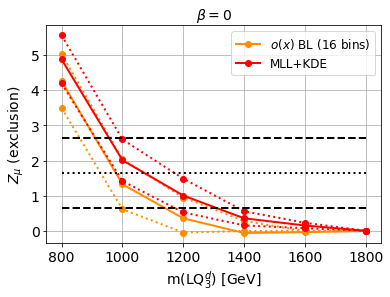

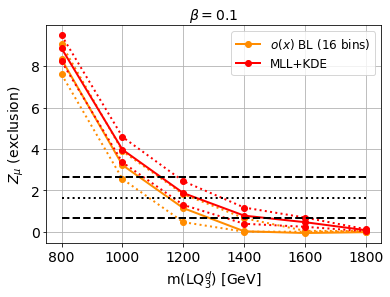

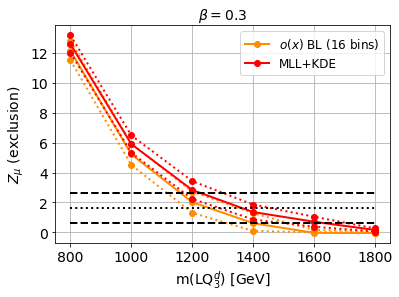

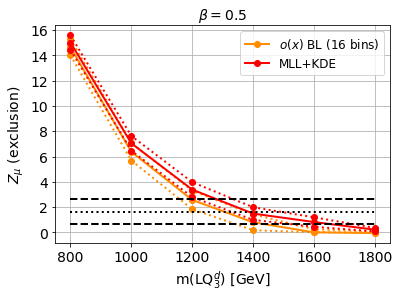

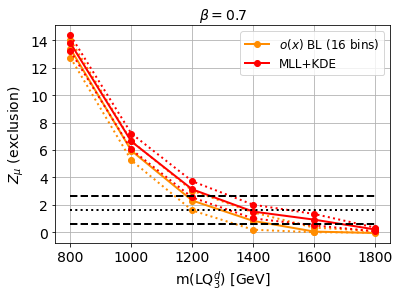

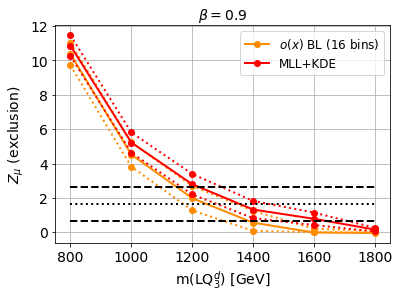

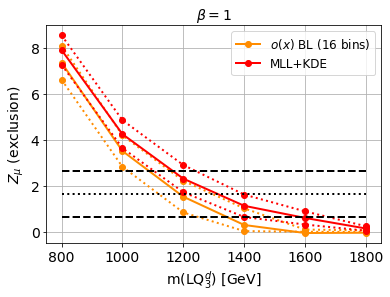

In [10]:
masses = [800, 1000, 1200, 1400, 1600, 1800]

Z164 = [1.64 for x in masses]
Z264 = [2.64 for x in masses]
Z064 = [0.64 for x in masses]

lw=2
plt.plot(masses, results_16bins_beta00, '-o', color='darkorange', lw=lw, label=r'$o(x)$ BL (16 bins)')
plt.plot(masses, results_16bins_plus_beta00, ':o', color='darkorange', lw=lw)
plt.plot(masses, results_16bins_min_beta00, ':o', color='darkorange', lw=lw)
plt.plot(masses, results_MLL_KDE_beta00, '-o', color='red', lw=lw, label=r'MLL+KDE') 
plt.plot(masses, results_MLL_KDE_plus_beta00, ':o', color='red', lw=lw) 
plt.plot(masses, results_MLL_KDE_min_beta00, ':o', color='red', lw=lw) 
plt.plot(masses, Z164, ':', color='black', lw=lw) 
plt.plot(masses, Z264, '--', color='black', lw=lw) 
plt.plot(masses, Z064, '--', color='black', lw=lw) 

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
#plt.xscale('log')
plt.xlabel('m(LQ$_3^d$) [GeV]', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title(r'$\beta = 0$', fontsize=14)
plt.legend(loc="upper right", fontsize=12)
plt.show()


plt.plot(masses, results_16bins_beta01, '-o', color='darkorange', lw=lw, label=r'$o(x)$ BL (16 bins)')
plt.plot(masses, results_16bins_plus_beta01, ':o', color='darkorange', lw=lw)
plt.plot(masses, results_16bins_min_beta01, ':o', color='darkorange', lw=lw)
plt.plot(masses, results_MLL_KDE_beta01, '-o', color='red', lw=lw, label=r'MLL+KDE') 
plt.plot(masses, results_MLL_KDE_plus_beta01, ':o', color='red', lw=lw) 
plt.plot(masses, results_MLL_KDE_min_beta01, ':o', color='red', lw=lw) 
plt.plot(masses, Z164, ':', color='black', lw=lw) 
plt.plot(masses, Z264, '--', color='black', lw=lw) 
plt.plot(masses, Z064, '--', color='black', lw=lw) 

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
#plt.xscale('log')
plt.xlabel('m(LQ$_3^d$) [GeV]', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title(r'$\beta = 0.1$', fontsize=14)
plt.legend(loc="upper right", fontsize=12)
plt.show()


plt.plot(masses, results_16bins_beta03, '-o', color='darkorange', lw=lw, label=r'$o(x)$ BL (16 bins)')
plt.plot(masses, results_16bins_plus_beta03, ':o', color='darkorange', lw=lw)
plt.plot(masses, results_16bins_min_beta03, ':o', color='darkorange', lw=lw)
plt.plot(masses, results_MLL_KDE_beta03, '-o', color='red', lw=lw, label=r'MLL+KDE') 
plt.plot(masses, results_MLL_KDE_plus_beta03, ':o', color='red', lw=lw) 
plt.plot(masses, results_MLL_KDE_min_beta03, ':o', color='red', lw=lw) 
plt.plot(masses, Z164, ':', color='black', lw=lw) 
plt.plot(masses, Z264, '--', color='black', lw=lw) 
plt.plot(masses, Z064, '--', color='black', lw=lw) 

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
#plt.xscale('log')
plt.xlabel('m(LQ$_3^d$) [GeV]', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title(r'$\beta = 0.3$', fontsize=14)
plt.legend(loc="upper right", fontsize=12)
plt.show()


plt.plot(masses, results_16bins_beta05, '-o', color='darkorange', lw=lw, label=r'$o(x)$ BL (16 bins)')
plt.plot(masses, results_16bins_plus_beta05, ':o', color='darkorange', lw=lw)
plt.plot(masses, results_16bins_min_beta05, ':o', color='darkorange', lw=lw)
plt.plot(masses, results_MLL_KDE_beta05, '-o', color='red', lw=lw, label=r'MLL+KDE') 
plt.plot(masses, results_MLL_KDE_plus_beta05, ':o', color='red', lw=lw) 
plt.plot(masses, results_MLL_KDE_min_beta05, ':o', color='red', lw=lw) 
plt.plot(masses, Z164, ':', color='black', lw=lw) 
plt.plot(masses, Z264, '--', color='black', lw=lw) 
plt.plot(masses, Z064, '--', color='black', lw=lw) 

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
#plt.xscale('log')
plt.xlabel('m(LQ$_3^d$) [GeV]', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title(r'$\beta = 0.5$', fontsize=14)
plt.legend(loc="upper right", fontsize=12)
plt.show()


plt.plot(masses, results_16bins_beta07, '-o', color='darkorange', lw=lw, label=r'$o(x)$ BL (16 bins)')
plt.plot(masses, results_16bins_plus_beta07, ':o', color='darkorange', lw=lw)
plt.plot(masses, results_16bins_min_beta07, ':o', color='darkorange', lw=lw)
plt.plot(masses, results_MLL_KDE_beta07, '-o', color='red', lw=lw, label=r'MLL+KDE') 
plt.plot(masses, results_MLL_KDE_plus_beta07, ':o', color='red', lw=lw) 
plt.plot(masses, results_MLL_KDE_min_beta07, ':o', color='red', lw=lw) 
plt.plot(masses, Z164, ':', color='black', lw=lw) 
plt.plot(masses, Z264, '--', color='black', lw=lw) 
plt.plot(masses, Z064, '--', color='black', lw=lw) 

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
#plt.xscale('log')
plt.xlabel('m(LQ$_3^d$) [GeV]', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title(r'$\beta = 0.7$', fontsize=14)
plt.legend(loc="upper right", fontsize=12)
plt.show()


plt.plot(masses, results_16bins_beta09, '-o', color='darkorange', lw=lw, label=r'$o(x)$ BL (16 bins)')
plt.plot(masses, results_16bins_plus_beta09, ':o', color='darkorange', lw=lw)
plt.plot(masses, results_16bins_min_beta09, ':o', color='darkorange', lw=lw)
plt.plot(masses, results_MLL_KDE_beta09, '-o', color='red', lw=lw, label=r'MLL+KDE') 
plt.plot(masses, results_MLL_KDE_plus_beta09, ':o', color='red', lw=lw) 
plt.plot(masses, results_MLL_KDE_min_beta09, ':o', color='red', lw=lw) 
plt.plot(masses, Z164, ':', color='black', lw=lw) 
plt.plot(masses, Z264, '--', color='black', lw=lw) 
plt.plot(masses, Z064, '--', color='black', lw=lw) 

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
#plt.xscale('log')
plt.xlabel('m(LQ$_3^d$) [GeV]', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title(r'$\beta = 0.9$', fontsize=14)
plt.legend(loc="upper right", fontsize=12)
plt.show()


plt.plot(masses, results_16bins_beta1, '-o', color='darkorange', lw=lw, label=r'$o(x)$ BL (16 bins)')
plt.plot(masses, results_16bins_plus_beta1, ':o', color='darkorange', lw=lw)
plt.plot(masses, results_16bins_min_beta1, ':o', color='darkorange', lw=lw)
plt.plot(masses, results_MLL_KDE_beta1, '-o', color='red', lw=lw, label=r'MLL+KDE') 
plt.plot(masses, results_MLL_KDE_plus_beta1, ':o', color='red', lw=lw) 
plt.plot(masses, results_MLL_KDE_min_beta1, ':o', color='red', lw=lw) 
plt.plot(masses, Z164, ':', color='black', lw=lw) 
plt.plot(masses, Z264, '--', color='black', lw=lw) 
plt.plot(masses, Z064, '--', color='black', lw=lw) 

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
#plt.xscale('log')
plt.xlabel('m(LQ$_3^d$) [GeV]', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title(r'$\beta = 1$', fontsize=14)
plt.legend(loc="upper right", fontsize=12)
plt.show()

### Interpolation

In [11]:
# Interpolation, cubic
res_f_16bins_beta00 = interp1d(masses, results_16bins_beta00, kind='quadratic')
res_f_16bins_plus_beta00 = interp1d(masses, results_16bins_plus_beta00, kind='quadratic')
res_f_16bins_min_beta00 = interp1d(masses, results_16bins_min_beta00, kind='quadratic')
res_f_MLL_KDE_beta00 = interp1d(masses, results_MLL_KDE_beta00, kind='quadratic')
res_f_MLL_KDE_plus_beta00 = interp1d(masses, results_MLL_KDE_plus_beta00, kind='quadratic')
res_f_MLL_KDE_min_beta00 = interp1d(masses, results_MLL_KDE_min_beta00, kind='quadratic')

res_f_16bins_beta01 = interp1d(masses, results_16bins_beta01, kind='quadratic')
res_f_16bins_plus_beta01 = interp1d(masses, results_16bins_plus_beta01, kind='quadratic')
res_f_16bins_min_beta01 = interp1d(masses, results_16bins_min_beta01, kind='quadratic')
res_f_MLL_KDE_beta01 = interp1d(masses, results_MLL_KDE_beta01, kind='quadratic')
res_f_MLL_KDE_plus_beta01 = interp1d(masses, results_MLL_KDE_plus_beta01, kind='quadratic')
res_f_MLL_KDE_min_beta01 = interp1d(masses, results_MLL_KDE_min_beta01, kind='quadratic')

res_f_16bins_beta03 = interp1d(masses, results_16bins_beta03, kind='quadratic')
res_f_16bins_plus_beta03 = interp1d(masses, results_16bins_plus_beta03, kind='quadratic')
res_f_16bins_min_beta03 = interp1d(masses, results_16bins_min_beta03, kind='quadratic')
res_f_MLL_KDE_beta03 = interp1d(masses, results_MLL_KDE_beta03, kind='quadratic')
res_f_MLL_KDE_plus_beta03 = interp1d(masses, results_MLL_KDE_plus_beta03, kind='quadratic')
res_f_MLL_KDE_min_beta03 = interp1d(masses, results_MLL_KDE_min_beta03, kind='quadratic')

res_f_16bins_beta05 = interp1d(masses, results_16bins_beta05, kind='quadratic')
res_f_16bins_plus_beta05 = interp1d(masses, results_16bins_plus_beta05, kind='quadratic')
res_f_16bins_min_beta05 = interp1d(masses, results_16bins_min_beta05, kind='quadratic')
res_f_MLL_KDE_beta05 = interp1d(masses, results_MLL_KDE_beta05, kind='quadratic')
res_f_MLL_KDE_plus_beta05 = interp1d(masses, results_MLL_KDE_plus_beta05, kind='quadratic')
res_f_MLL_KDE_min_beta05 = interp1d(masses, results_MLL_KDE_min_beta05, kind='quadratic')

res_f_16bins_beta07 = interp1d(masses, results_16bins_beta07, kind='quadratic')
res_f_16bins_plus_beta07 = interp1d(masses, results_16bins_plus_beta07, kind='quadratic')
res_f_16bins_min_beta07 = interp1d(masses, results_16bins_min_beta07, kind='quadratic')
res_f_MLL_KDE_beta07 = interp1d(masses, results_MLL_KDE_beta07, kind='quadratic')
res_f_MLL_KDE_plus_beta07 = interp1d(masses, results_MLL_KDE_plus_beta07, kind='quadratic')
res_f_MLL_KDE_min_beta07 = interp1d(masses, results_MLL_KDE_min_beta07, kind='quadratic')

res_f_16bins_beta09 = interp1d(masses, results_16bins_beta09, kind='quadratic')
res_f_16bins_plus_beta09 = interp1d(masses, results_16bins_plus_beta09, kind='quadratic')
res_f_16bins_min_beta09 = interp1d(masses, results_16bins_min_beta09, kind='quadratic')
res_f_MLL_KDE_beta09 = interp1d(masses, results_MLL_KDE_beta09, kind='quadratic')
res_f_MLL_KDE_plus_beta09 = interp1d(masses, results_MLL_KDE_plus_beta09, kind='quadratic')
res_f_MLL_KDE_min_beta09 = interp1d(masses, results_MLL_KDE_min_beta09, kind='quadratic')

res_f_16bins_beta1 = interp1d(masses, results_16bins_beta1, kind='quadratic')
res_f_16bins_plus_beta1 = interp1d(masses, results_16bins_plus_beta1, kind='quadratic')
res_f_16bins_min_beta1 = interp1d(masses, results_16bins_min_beta1, kind='quadratic')
res_f_MLL_KDE_beta1 = interp1d(masses, results_MLL_KDE_beta1, kind='quadratic')
res_f_MLL_KDE_plus_beta1 = interp1d(masses, results_MLL_KDE_plus_beta1, kind='quadratic')
res_f_MLL_KDE_min_beta1 = interp1d(masses, results_MLL_KDE_min_beta1, kind='quadratic')

In [12]:
# AUX FUNCTION TO FIND SOLUTIONS

def dx(fn, x, delta=0.001):
    return (fn(x+delta) - fn(x))/delta

def solvemass(fn, value, x=1000, maxtries=1000, maxerr=0.00001):
    for tries in range(maxtries):
        err = fn(x) - value
        if abs(err) < maxerr:
            return x
        slope = dx(fn, x)
        x -= err/slope
    raise ValueError('no solution found')

In [13]:
beta = [0,0.1,0.3,0.5,0.7,0.9,1]


mass_16bins_beta00 = solvemass(res_f_16bins_beta00, 1.64)
mass_16bins_plus_beta00 = solvemass(res_f_16bins_plus_beta00, 1.64)
mass_16bins_min_beta00 = solvemass(res_f_16bins_min_beta00, 1.64)
mass_MLL_beta00 = solvemass(res_f_MLL_KDE_beta00, 1.64)
mass_MLL_plus_beta00 = solvemass(res_f_MLL_KDE_plus_beta00, 1.64)
mass_MLL_min_beta00 = solvemass(res_f_MLL_KDE_min_beta00, 1.64)

mass_16bins_beta01 = solvemass(res_f_16bins_beta01, 1.64)
mass_16bins_plus_beta01 = solvemass(res_f_16bins_plus_beta01, 1.64)
mass_16bins_min_beta01 = solvemass(res_f_16bins_min_beta01, 1.64)
mass_MLL_beta01 = solvemass(res_f_MLL_KDE_beta01, 1.64)
mass_MLL_plus_beta01 = solvemass(res_f_MLL_KDE_plus_beta01, 1.64)
mass_MLL_min_beta01 = solvemass(res_f_MLL_KDE_min_beta01, 1.64)

mass_16bins_beta03 = solvemass(res_f_16bins_beta03, 1.64)
mass_16bins_plus_beta03 = solvemass(res_f_16bins_plus_beta03, 1.64)
mass_16bins_min_beta03 = solvemass(res_f_16bins_min_beta03, 1.64)
mass_MLL_beta03 = solvemass(res_f_MLL_KDE_beta03, 1.64)
mass_MLL_plus_beta03 = solvemass(res_f_MLL_KDE_plus_beta03, 1.64)
mass_MLL_min_beta03 = solvemass(res_f_MLL_KDE_min_beta03, 1.64)

mass_16bins_beta05 = solvemass(res_f_16bins_beta05, 1.64)
mass_16bins_plus_beta05 = solvemass(res_f_16bins_plus_beta05, 1.64)
mass_16bins_min_beta05 = solvemass(res_f_16bins_min_beta05, 1.64)
mass_MLL_beta05 = solvemass(res_f_MLL_KDE_beta05, 1.64)
mass_MLL_plus_beta05 = solvemass(res_f_MLL_KDE_plus_beta05, 1.64)
mass_MLL_min_beta05 = solvemass(res_f_MLL_KDE_min_beta05, 1.64)

mass_16bins_beta07 = solvemass(res_f_16bins_beta07, 1.64)
mass_16bins_plus_beta07 = solvemass(res_f_16bins_plus_beta07, 1.64)
mass_16bins_min_beta07 = solvemass(res_f_16bins_min_beta07, 1.64)
mass_MLL_beta07 = solvemass(res_f_MLL_KDE_beta07, 1.64)
mass_MLL_plus_beta07 = solvemass(res_f_MLL_KDE_plus_beta07, 1.64)
mass_MLL_min_beta07 = solvemass(res_f_MLL_KDE_min_beta07, 1.64)

mass_16bins_beta09 = solvemass(res_f_16bins_beta09, 1.64)
mass_16bins_plus_beta09 = solvemass(res_f_16bins_plus_beta09, 1.64)
mass_16bins_min_beta09 = solvemass(res_f_16bins_min_beta09, 1.64)
mass_MLL_beta09 = solvemass(res_f_MLL_KDE_beta09, 1.64)
mass_MLL_plus_beta09 = solvemass(res_f_MLL_KDE_plus_beta09, 1.64)
mass_MLL_min_beta09 = solvemass(res_f_MLL_KDE_min_beta09, 1.64)

mass_16bins_beta1 = solvemass(res_f_16bins_beta1, 1.64)
mass_16bins_plus_beta1 = solvemass(res_f_16bins_plus_beta1, 1.64)
mass_16bins_min_beta1 = solvemass(res_f_16bins_min_beta1, 1.64)
mass_MLL_beta1 = solvemass(res_f_MLL_KDE_beta1, 1.64)
mass_MLL_plus_beta1 = solvemass(res_f_MLL_KDE_plus_beta1, 1.64)
mass_MLL_min_beta1 = solvemass(res_f_MLL_KDE_min_beta1, 1.64)

mass_16bins = [mass_16bins_beta00, mass_16bins_beta01, mass_16bins_beta03, mass_16bins_beta05, mass_16bins_beta07, mass_16bins_beta09, mass_16bins_beta1]
mass_16bins_plus = [mass_16bins_plus_beta00, mass_16bins_plus_beta01, mass_16bins_plus_beta03, mass_16bins_plus_beta05, mass_16bins_plus_beta07, mass_16bins_plus_beta09, mass_16bins_plus_beta1]
mass_16bins_min = [mass_16bins_min_beta00, mass_16bins_min_beta01, mass_16bins_min_beta03, mass_16bins_min_beta05, mass_16bins_min_beta07, mass_16bins_min_beta09, mass_16bins_min_beta1]
mass_MLL = [mass_MLL_beta00, mass_MLL_beta01, mass_MLL_beta03, mass_MLL_beta05, mass_MLL_beta07, mass_MLL_beta09, mass_MLL_beta1]
mass_MLL_plus = [mass_MLL_plus_beta00, mass_MLL_plus_beta01, mass_MLL_plus_beta03, mass_MLL_plus_beta05, mass_MLL_plus_beta07, mass_MLL_plus_beta09, mass_MLL_plus_beta1]
mass_MLL_min = [mass_MLL_min_beta00, mass_MLL_min_beta01, mass_MLL_min_beta03, mass_MLL_min_beta05, mass_MLL_min_beta07, mass_MLL_min_beta09, mass_MLL_min_beta1]

print(' LQ mass value such that Z = 1.64')
print(mass_16bins)
print(mass_16bins_plus)
print(mass_16bins_min)
print(mass_MLL)
print(mass_MLL_plus)
print(mass_MLL_min)

 LQ mass value such that Z = 1.64
[968.6216012269981, 1135.2649616070375, 1239.542080097361, 1285.1943971395863, 1268.5496181571523, 1239.492450743735, 1184.9455446940128]
[1047.9741350846605, 1224.4787359453003, 1343.4437721703164, 1372.084302415518, 1371.487831900155, 1338.607896489739, 1286.9226212447472]
[907.6437258789256, 1060.6238540199101, 1169.6318249376043, 1215.6443367825293, 1196.3043213057372, 1159.719383279183, 1100.3003115116994]
[1047.5540905707553, 1232.2027970867186, 1348.8398296305045, 1375.731547452843, 1375.6963442715435, 1344.0388878550964, 1298.8673246311873]
[1166.072925423124, 1310.8256951204492, 1443.1688656464205, 1464.5157584601382, 1497.0234121751398, 1438.2246828138195, 1394.828085162463]
[975.8619625017287, 1152.1254000987335, 1266.750206247162, 1307.6228084565787, 1294.185112541922, 1267.9649151841877, 1210.6603849538785]


In [14]:
# Expected ATLAS fig 9a https://www.hepdata.net/record/105998

beta_ATLAS = [0.0,0.0055605,0.010101,0.011175,0.016681,0.020202,0.02206,0.027174,0.030303,0.031929,0.036353,0.040404,0.040563,0.04484,0.049374,0.050505,0.054477,0.06021,0.060606,0.066647,0.070707,0.073462,0.080396,0.080808,0.087386,0.090909,0.094345,0.10101,0.10154,0.10947,0.11111,0.11841,0.12121,0.12873,0.13131,0.14064,0.14141,0.15152,0.15449,0.16162,0.17034,0.17172,0.18182,0.18895,0.19192,0.20202,0.21133,0.21212,0.22222,0.23232,0.23986,0.24242,0.25253,0.26263,0.27273,0.27806,0.28283,0.29293,0.30303,0.31313,0.32323,0.33188,0.33333,0.34343,0.35354,0.36364,0.37374,0.38384,0.39394,0.40404,0.41414,0.41599,0.42424,0.43434,0.44444,0.45455,0.46465,0.47475,0.48485,0.49495,0.50505,0.51515,0.52525,0.53535,0.54545,0.55556,0.56566,0.57576,0.58586,0.59596,0.60606,0.61616,0.62626,0.63636,0.64646,0.65657,0.66667,0.67677,0.68551,0.68687,0.69697,0.70707,0.71717,0.72727,0.73737,0.74747,0.75758,0.75862,0.76768,0.77778,0.78788,0.79798,0.79895,0.80808,0.81818,0.82745,0.82828,0.83838,0.84848,0.85245,0.85859,0.86869,0.87721,0.87879,0.88889,0.89899,0.90151,0.90909,0.91919,0.92359,0.92929,0.93939,0.94203,0.94949,0.95666,0.9596,0.96827,0.9697,0.97795,0.9798,0.9867,0.9899,0.99521,1.0]
mass_Z95CL_ATLAS = [771.93,787.88,800.86,804.04,820.2,830.76,836.36,852.53,863.22,868.69,884.85,900.42,901.01,917.17,933.33,937.08,949.49,965.66,966.72,981.82,991.76,997.98,1014.1,1015.2,1030.3,1038.8,1046.5,1061.5,1062.6,1078.8,1082.0,1094.9,1099.7,1111.1,1114.9,1127.3,1128.3,1140.3,1143.4,1151.2,1159.6,1161.0,1170.1,1175.8,1178.2,1185.7,1191.9,1192.5,1198.7,1204.3,1208.1,1209.4,1214.1,1218.4,1222.3,1224.2,1225.9,1229.3,1232.5,1235.4,1238.2,1240.4,1240.8,1243.2,1245.4,1247.5,1249.5,1251.4,1253.1,1254.8,1256.3,1256.6,1257.7,1258.9,1260.1,1261.1,1262.1,1262.9,1263.6,1264.3,1264.8,1265.2,1265.6,1265.8,1265.9,1265.9,1265.8,1265.6,1265.3,1264.9,1264.4,1263.8,1263.1,1262.3,1261.3,1260.3,1259.1,1257.8,1256.6,1256.4,1254.7,1252.9,1250.9,1248.7,1246.3,1243.6,1240.7,1240.4,1237.4,1233.6,1229.4,1224.7,1224.2,1219.6,1213.9,1208.1,1207.6,1201.5,1194.8,1191.9,1188.2,1181.7,1175.8,1174.8,1168.3,1161.4,1159.6,1154.3,1146.9,1143.4,1138.7,1129.7,1127.3,1119.3,1111.1,1107.2,1094.9,1092.7,1078.8,1075.5,1062.6,1056.7,1046.5,1037.4]

beta_ATLAS_plus1sig = [0, 0.013679890560875513, 0.024623803009575923, 0.04377564979480164, 0.06703146374829001, 0.10807113543091655, 0.1518467852257182, 0.18331053351573187, 0.2476060191518467, 0.3283173734610123, 0.4131326949384405, 0.49247606019151846, 0.5567715458276333, 0.6333789329685362, 0.6963064295485636, 0.759233926128591, 0.8221614227086184, 0.8645690834473324, 0.9069767441860465, 0.945280437756498, 0.9740082079343365, 1]
mass_Z95CL_ATLAS_plus1sig = [619.8852772466539, 700.9560229445507, 762.1414913957935, 824.8565965583174, 892.1606118546845, 980.8795411089866, 1043.5946462715106, 1084.8948374760994, 1124.6653919694072, 1149.1395793499044, 1169.0248565965583, 1176.6730401529635, 1176.6730401529635, 1172.0841300191205, 1162.906309751434, 1149.1395793499044, 1127.7246653919694, 1101.7208413001913, 1060.4206500956022, 1016.0611854684512, 965.5831739961759, 907.4569789674952]

beta_ATLAS_minus1sig = [0, 0.024623803009575923, 0.046511627906976744, 0.06703146374829001, 0.08755129958960328, 0.10807113543091655, 0.13406292749658003, 0.1709986320109439, 0.24213406292749656, 0.32694938440492477, 0.4131326949384405, 0.5047879616963065, 0.5882352941176471, 0.6716826265389877, 0.7400820793433652, 0.8084815321477428, 0.8618331053351573, 0.8946648426812586, 0.9151846785225718, 0.9343365253077975, 0.9740082079343365, 1]
mass_Z95CL_ATLAS_minus1sig = [846.2715105162524, 922.7533460803058, 1000.7648183556405, 1054.302103250478, 1107.8393881453155, 1152.1988527724666, 1196.5583173996174, 1239.3881453154877, 1280.6883365200765, 1302.1032504780114, 1318.9292543021033, 1323.5181644359463, 1326.5774378585086, 1321.9885277246653, 1312.810707456979, 1295.9847036328872, 1277.6290630975143, 1256.2141491395794, 1233.2695984703632, 1205.7361376673039, 1170.5544933078395, 1139.9617590822181]

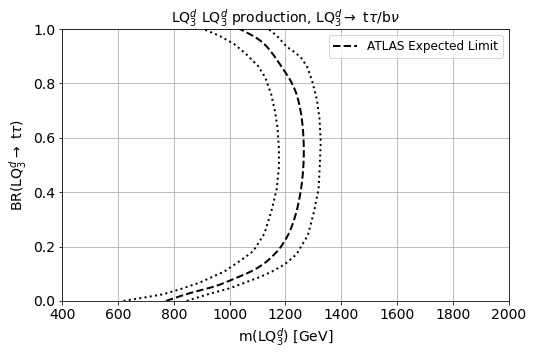

In [15]:
plt.figure(figsize = (8,5))
lw = 2
plt.plot(mass_Z95CL_ATLAS, beta_ATLAS, '--', color='black', lw=lw, label=r'ATLAS Expected Limit') 
plt.plot(mass_Z95CL_ATLAS_plus1sig, beta_ATLAS_plus1sig, ':', color='black', lw=2) 
plt.plot(mass_Z95CL_ATLAS_minus1sig, beta_ATLAS_minus1sig, ':', color='black', lw=2) 
plt.xlim([400, 2000])
plt.ylim([0., 1])
#plt.xscale('log')
plt.xlabel('m(LQ$_3^d$) [GeV]', fontsize=14)
plt.ylabel(r'BR(LQ$_3^d \rightarrow$ t$\tau$)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title(r'LQ$_3^d$ LQ$_3^d$ production, LQ$_3^d \rightarrow$ t$\tau$/b$\nu$', fontsize=14)
plt.legend(fontsize=12)
plt.show()

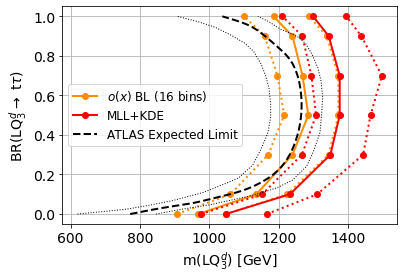

In [16]:
plt.figure()
lw = 2

plt.plot(mass_16bins, beta, '-o', color='darkorange', lw=lw, label=r'$o(x)$ BL (16 bins)')
plt.plot(mass_16bins_plus, beta, ':o', color='darkorange', lw=lw) 
plt.plot(mass_16bins_min, beta, ':o', color='darkorange', lw=lw)
plt.plot(mass_MLL, beta, '-o', color='red', lw=lw, label=r'MLL+KDE') 
plt.plot(mass_MLL_plus, beta, ':o', color='red', lw=lw) 
plt.plot(mass_MLL_min, beta, ':o', color='red', lw=lw) 
plt.plot(mass_Z95CL_ATLAS, beta_ATLAS, '--', color='black', lw=lw, label=r'ATLAS Expected Limit') 
plt.plot(mass_Z95CL_ATLAS_plus1sig, beta_ATLAS_plus1sig, ':', color='black', lw=1) 
plt.plot(mass_Z95CL_ATLAS_minus1sig, beta_ATLAS_minus1sig, ':', color='black', lw=1) 

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
#plt.xscale('log')
plt.xlabel('m(LQ$_3^d$) [GeV]', fontsize=14)
plt.ylabel(r'BR(LQ$_3^d \rightarrow$ t$\tau$)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
#plt.title('<B> per ensemble: %0.2d' % B_expected, fontsize=14)
plt.legend(fontsize=12)
plt.show()

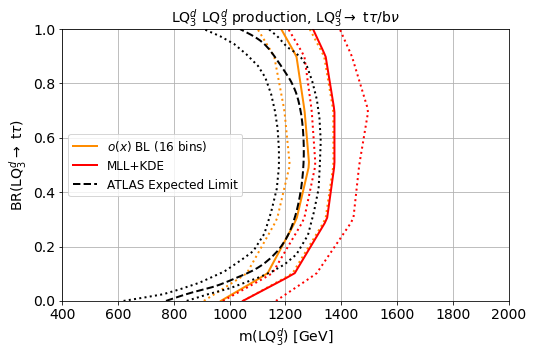

In [17]:
mass_Z95CL_16bins = interp1d(beta, mass_16bins, kind='linear')
mass_Z95CL_16bins_plus = interp1d(beta, mass_16bins_plus, kind='linear')
mass_Z95CL_16bins_min = interp1d(beta, mass_16bins_min, kind='linear')
mass_Z95CL_MLL = interp1d(beta, mass_MLL, kind='linear')
mass_Z95CL_MLL_plus = interp1d(beta, mass_MLL_plus, kind='linear')
mass_Z95CL_MLL_min = interp1d(beta, mass_MLL_min, kind='linear')

plotX_beta = np.linspace(min(beta), max(beta), num=50, endpoint=True)

#plt.figure()
plt.figure(figsize = (8,5))
lw = 2

plt.plot(mass_Z95CL_16bins(plotX_beta), plotX_beta, '-', color='darkorange', lw=lw, label=r'$o(x)$ BL (16 bins)') 
plt.plot(mass_Z95CL_16bins_plus(plotX_beta), plotX_beta, ':', color='darkorange', lw=lw)
plt.plot(mass_Z95CL_16bins_min(plotX_beta), plotX_beta, ':', color='darkorange', lw=lw)
plt.plot(mass_Z95CL_MLL(plotX_beta), plotX_beta, '-', color='red', lw=lw, label=r'MLL+KDE')
plt.plot(mass_Z95CL_MLL_plus(plotX_beta), plotX_beta, ':', color='red', lw=lw)
plt.plot(mass_Z95CL_MLL_min(plotX_beta), plotX_beta, ':', color='red', lw=lw)
plt.plot(mass_Z95CL_ATLAS, beta_ATLAS, '--', color='black', lw=lw, label=r'ATLAS Expected Limit') 
plt.plot(mass_Z95CL_ATLAS_plus1sig, beta_ATLAS_plus1sig, ':', color='black', lw=2) 
plt.plot(mass_Z95CL_ATLAS_minus1sig, beta_ATLAS_minus1sig, ':', color='black', lw=2) 

plt.xlim([400, 2000])
plt.ylim([0., 1])
#plt.xscale('log')
plt.xlabel('m(LQ$_3^d$) [GeV]', fontsize=14)
plt.ylabel(r'BR(LQ$_3^d \rightarrow$ t$\tau$)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title(r'LQ$_3^d$ LQ$_3^d$ production, LQ$_3^d \rightarrow$ t$\tau$/b$\nu$', fontsize=14)
plt.legend(fontsize=12)
plt.show()

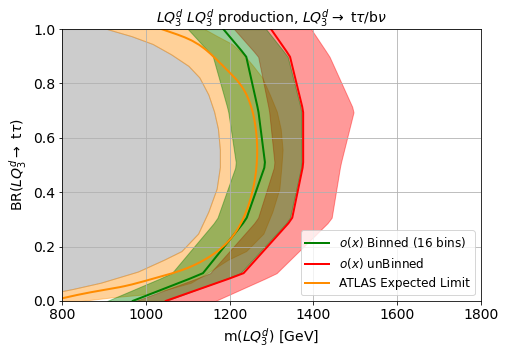

In [18]:

#plt.figure()
lw = 2

test_A = pd.DataFrame({'ATLAS_beta': beta_ATLAS_plus1sig,
                     'ATLAS_low':mass_Z95CL_ATLAS_plus1sig,
                     'ATLAS_up':mass_Z95CL_ATLAS_minus1sig})


test = pd.DataFrame({'BR': plotX_beta.tolist(),
                    'MLL_low': mass_Z95CL_MLL_plus(plotX_beta).tolist(),
                      'MLL_up': mass_Z95CL_MLL_min(plotX_beta).tolist(),
                     '16bins_low': mass_Z95CL_16bins_plus(plotX_beta).tolist(),
                      '16bins_up': mass_Z95CL_16bins_min(plotX_beta).tolist()})
mineral_names = test.columns[1:]

fig = plt.figure(figsize=(30, 5))
gs = gridspec.GridSpec(nrows=1, ncols=4, wspace=0)

ax = fig.add_subplot(gs[0, 1])
for mineral_name in mineral_names[:-1]:
    ax.plot(test[mineral_name], test['BR'], linewidth=2, color='None')
    
    
ax.fill_betweenx(test_A['ATLAS_beta'], 0, test_A['ATLAS_low'], color='gray', alpha=0.4)
ax.fill_betweenx(test_A['ATLAS_beta'], test_A['ATLAS_low'], test_A['ATLAS_up'], color='darkorange', alpha=0.4)

colors = [ "None", "red", "None", "green", "None"]
previous_curve = 0
previous_name = ''
for mineral_name, color in zip(mineral_names, colors):
    ax.fill_betweenx(test['BR'], previous_curve, test[mineral_name], color=color, alpha=0.4)
    previous_curve = test[mineral_name]
    previous_name = mineral_name
    
    
    

plt.plot(mass_Z95CL_16bins(plotX_beta), plotX_beta, '-', color='green', lw=lw, label=r'$o(x)$ Binned (16 bins)') 
plt.plot(mass_Z95CL_MLL(plotX_beta), plotX_beta, '-', color='red', lw=lw, label=r'$o(x)$ unBinned')
plt.plot(mass_Z95CL_ATLAS, beta_ATLAS, '-', color='darkorange', lw=lw, label=r'ATLAS Expected Limit') 

plt.xlim([800, 1800])
plt.ylim([0., 1])
#plt.xscale('log')
plt.xlabel('m($LQ_3^d$) [GeV]', fontsize=14)
plt.ylabel(r'BR($LQ_3^d \rightarrow$ t$\tau$)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title(r'$LQ_3^d$ $LQ_3^d$ production, $LQ_3^d \rightarrow$ t$\tau$/b$\nu$', fontsize=14)
plt.legend(loc = 'lower right', fontsize=12)
plt.savefig('exclusion_LQdown_no_uncertainty.pdf', bbox_inches='tight')
plt.show()

In [19]:
# BR values
print(plotX_beta)

[0.         0.02040816 0.04081633 0.06122449 0.08163265 0.10204082
 0.12244898 0.14285714 0.16326531 0.18367347 0.20408163 0.2244898
 0.24489796 0.26530612 0.28571429 0.30612245 0.32653061 0.34693878
 0.36734694 0.3877551  0.40816327 0.42857143 0.44897959 0.46938776
 0.48979592 0.51020408 0.53061224 0.55102041 0.57142857 0.59183673
 0.6122449  0.63265306 0.65306122 0.67346939 0.69387755 0.71428571
 0.73469388 0.75510204 0.7755102  0.79591837 0.81632653 0.83673469
 0.85714286 0.87755102 0.89795918 0.91836735 0.93877551 0.95918367
 0.97959184 1.        ]


In [20]:
# Mass values (BL)
print( mass_Z95CL_16bins(plotX_beta) )
print( mass_Z95CL_16bins_plus(plotX_beta) )
print( mass_Z95CL_16bins_min(plotX_beta) )

[ 968.62160123 1002.63045028 1036.63929934 1070.6481484  1104.65699746
 1136.32901384 1146.96953613 1157.61005843 1168.25058072 1178.89110302
 1189.53162531 1200.17214761 1210.8126699  1221.4531922  1232.09371449
 1240.93960001 1245.59799971 1250.2563994  1254.9147991  1259.5731988
 1264.2315985  1268.8899982  1273.54839789 1278.20679759 1282.86519729
 1284.34517372 1282.64672689 1280.94828005 1279.24983322 1277.55138638
 1275.85293955 1274.15449271 1272.45604588 1270.75759904 1269.05915221
 1266.4741062  1263.50908912 1260.54407203 1257.57905495 1254.61403787
 1251.64902078 1248.6840037  1245.71898662 1242.75396954 1239.78895245
 1229.47363127 1218.34160962 1207.20958798 1196.07756634 1184.94554469]
[1047.97413508 1083.9954822  1120.01682931 1156.03817643 1192.05952354
 1225.69266489 1237.8319543  1249.97124371 1262.11053312 1274.24982253
 1286.38911194 1298.52840135 1310.66769076 1322.80698017 1334.94626958
 1344.3205231  1347.24302618 1350.16552927 1353.08803235 1356.01053544
 1358.

In [21]:
# Mass values (MLL)
print( mass_Z95CL_MLL(plotX_beta) )
print( mass_Z95CL_MLL_plus(plotX_beta) )
print( mass_Z95CL_MLL_min(plotX_beta) )

[1047.55409057 1085.23750006 1122.92090956 1160.60431905 1198.28772854
 1233.39297089 1245.2947089  1257.19644692 1269.09818493 1280.99992295
 1292.90166096 1304.80339898 1316.70513699 1328.60687501 1340.50861302
 1349.66304548 1352.40709832 1355.15115116 1357.895204   1360.63925684
 1363.38330968 1366.12736252 1368.87141536 1371.61546819 1374.35952103
 1375.72975137 1375.72615921 1375.72256705 1375.71897489 1375.71538273
 1375.71179057 1375.7081984  1375.70460624 1375.70101408 1375.69742192
 1373.43509738 1370.20474469 1366.97439199 1363.7440393  1360.5136866
 1357.28333391 1354.05298121 1350.82262852 1347.59227582 1344.36192312
 1335.74207012 1326.52338375 1317.30469738 1308.086011   1298.86732463]
[1166.07292542 1195.61430699 1225.15568856 1254.69707014 1284.23845171
 1312.17613564 1325.68054079 1339.18494595 1352.6893511  1366.19375626
 1379.69816141 1393.20256657 1406.70697173 1420.21137688 1433.71578204
 1443.82234196 1446.00059633 1448.17885069 1450.35710506 1452.53535943
 1454.